<a href="https://colab.research.google.com/github/yuyaya2016/Fashion_MNIST_Classification/blob/master/Tensorboard_FashionMNIST_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
logdir = 'Colab Notebooks/fashion_mnist/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(logdir)
)

! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://55bdb20e.ngrok.io


# New Section

In [0]:
test_data = np.array(pd.read_csv('drive/My Drive/Colab Notebooks/fashion-mnist_test.csv'), dtype = 'float32')
test_data[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
embed_count = 2500
x_test = test_data[:embed_count, 1:] / 255
y_test = test_data[:embed_count, 0]

In [0]:
# setup the summary write and embedding tensor
summary_writer = tf.summary.FileWriter(logdir)
embedding_var = tf.Variable(x_test, name = 'fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28,28])

projector.visualize_embeddings(summary_writer, config)

In [0]:
#run the session to create the model check point
with tf.Session() as sesh:
  sesh.run(tf.global_variables_initializer())
  saver = tf.train.Saver(write_version=tf.train.SaverDef.V2)
  save_path = saver.save(sesh, os.path.join(logdir, 'model.ckpt')) 

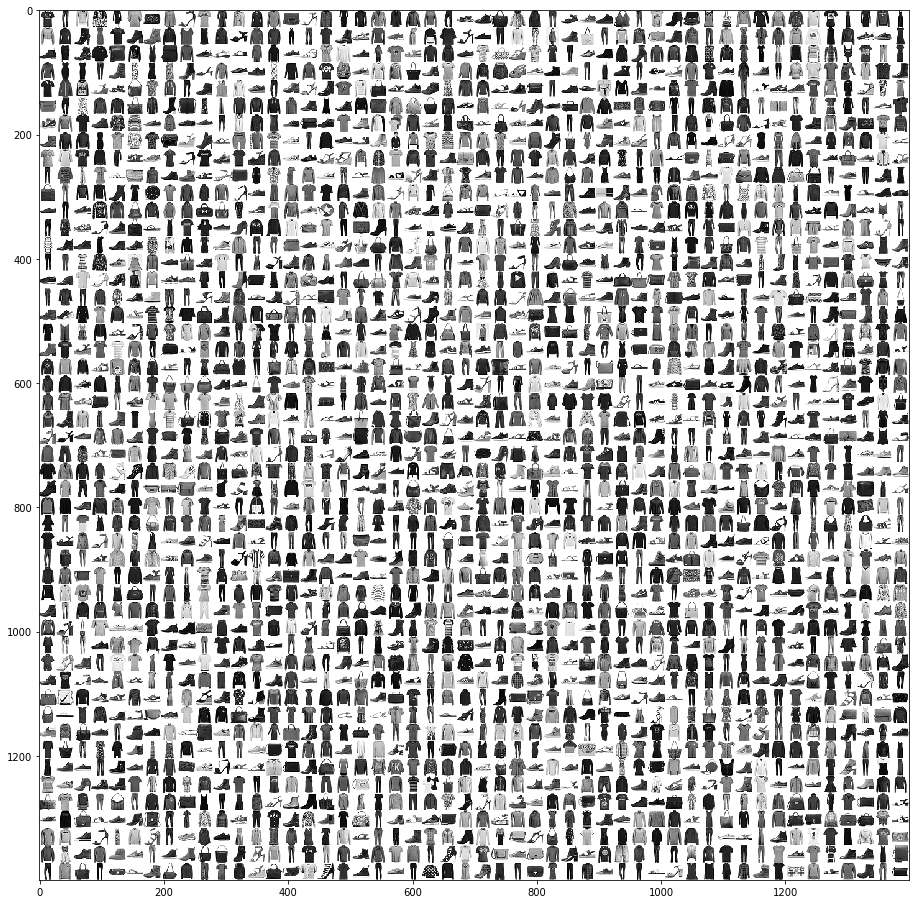

In [0]:
rows = 28 
cols = 28 

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))
sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
  for j in range(sprite_dim):
    labels.append(label[int(y_test[index])])

    sprite_image[
                 i * cols: (i + 1) * cols,
                 j * rows: (j + 1) * rows
    ] = x_test[index].reshape(28, 28) * -1 + 1

    index += 1

with open(embedding.metadata_path, 'w') as meta:
  meta.write('Index\tLabel\n')
  for index, label in enumerate(labels):
    meta.write('{}\t{}\n'.format(index, label))

plt.figure(figsize=[18,16])
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show();